# Exercise 02: Exploring Fourier Decomposition and Visible Light

---
## Part 1: Generating a Single Wavelength Light Wave

In [1]:
import numpy as np
import matplotlib.pyplot as plt

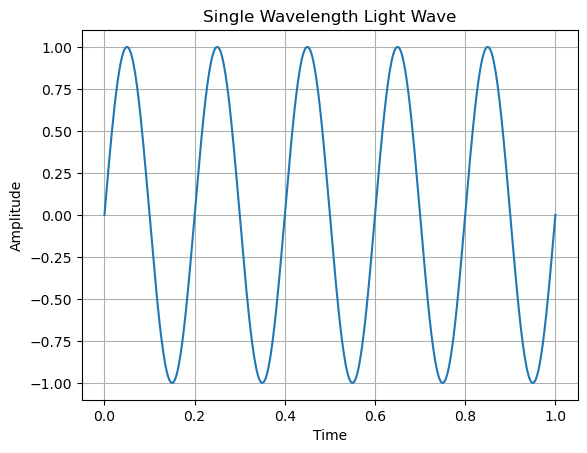

In [2]:
# Define parameters
A = 1  # Amplitude
f = 5  # Frequency
time_start = 0
time_end = 1
t = np.linspace(time_start, time_end, 500)  # Time array (0 to 2pi)

# Generate the sine wave for a single wavelength
wave = A * np.sin(2 * np.pi * f * t)

# Plot the wave
plt.plot(t, wave)
plt.title("Single Wavelength Light Wave")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### Questions for Part 1:

1. How many oscillations (peaks) do you see in the plot? What does the frequency ($f=1$) represent? <br>
   **There are 5 oscillations; Frequency indicates the amount of oscillations in one second.**
   <br><br>
3. What happens if you increase the frequency to 10? Try changing $f=5$ in the code and re-run the cell. <br>
   **The number of oscillation doubles - from 5 to 10 cycles.**

---
## Part 2: Reducing Time Axis

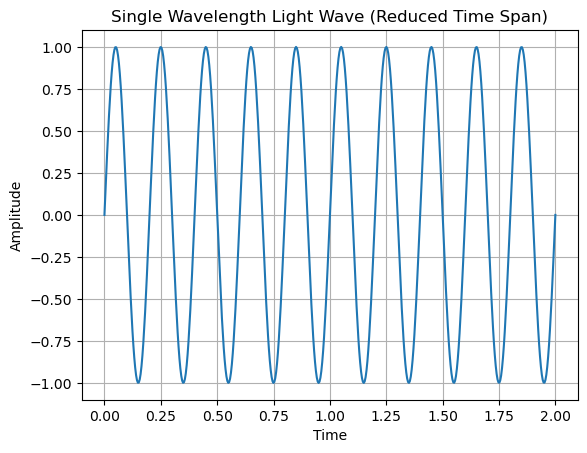

In [3]:
# Adjust the time axis to a shorter range
time_start = 0
time_end = 2
t = np.linspace(time_start, time_end, 500)  # Time array (0 to 2pi)

f = 5  # Frequency

# Generate the sine wave for the same frequency
wave = A * np.sin(2 * np.pi * f * t)

# Plot the wave
plt.plot(t, wave)
plt.title("Single Wavelength Light Wave (Reduced Time Span)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### Questions for Part 2:
1. How many peaks do you see now compared to the original time range?<br>
    **There are 3 peaks, less than the initial plot.** <br><br>
2. What is the effect of reducing the time axis on the appearance of the wave? Try playing with the $time\_end$ variable (either increasing or decreasing). You can also copy the code and create new blocks if it helps. <br>
    **Changing the time controls the amount of displayed data on the plot.**

---
## Part 3: Combining Multiple Waves (Simulating White Light)

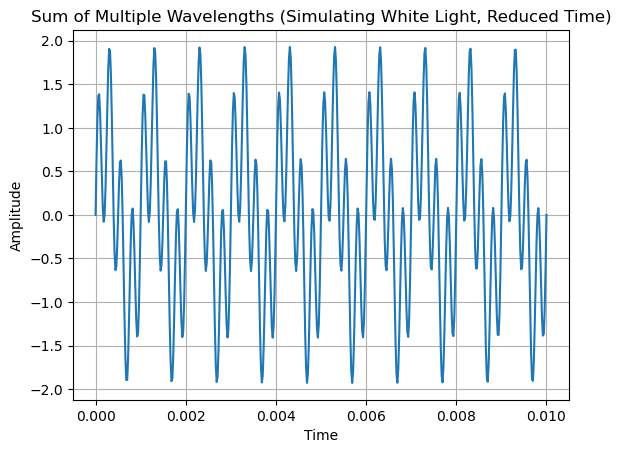

In [4]:
# Define multiple frequencies
freqs = [1000, 4000] # Arbitrary frequencies representing different colors

time_start = 0
time_end = .01
t = np.linspace(time_start, time_end, 500)  # Time array (0 to 2pi)

# Generate the sum of waves
combined_wave = np.zeros_like(t)
for f in freqs:
    combined_wave += A * np.sin(2 * np.pi * f * t)

# Plot the combined wave
plt.plot(t, combined_wave)
plt.title("Sum of Multiple Wavelengths (Simulating White Light, Reduced Time)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

### Questions for Part 3:

1. What happens when you combine multiple sine waves of different frequencies? <br>
**The resultant is a modified sin wave - exhbiting the sinusoidal properties of the two input waves.** <br><br>
2. Does the combined wave still look like a sine wave? Why or why not? <br>
**It looks like a sine wave because it looks cyclical, with the signal increasing and decreasing at intervals.**

---
## Part 4: Fourier Analysis of the Combined Wave

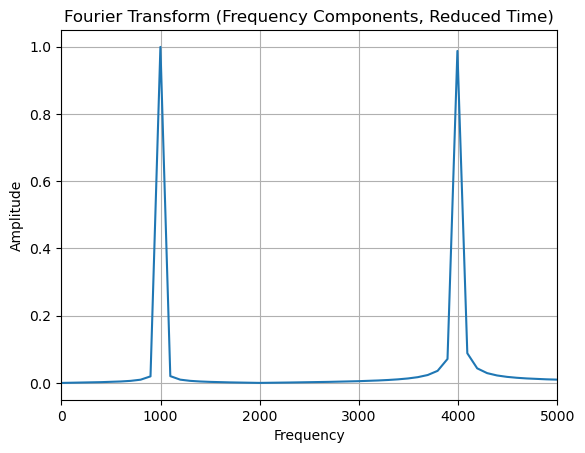

In [5]:
from scipy.fft import fft, fftfreq

# Perform Fourier Transform
N = len(t)
T = t[1] - t[0]  # Sampling interval
yf = fft(combined_wave)
xf = fftfreq(N, T)[:N//2]

# Plot the Fourier Transform (showing the frequency components)
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.title("Fourier Transform (Frequency Components, Reduced Time)")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim([0, 5000])
plt.show()

### Questions for Part 4:

1. Look at the Fourier transform plot. What do the peaks in the plot represent? <br>
**The peaks represent frequency of the signals of the deconstructed wave. It can be seen that the wave is comprised of waves with frequencies 1 kHz and 4 kHz.** <br>
2. How do the peaks relate to the frequencies of the individual sine waves you combined in the previous section? <br>
**The peaks correspond to the input sin waves.**<br>

3. Why is Fourier analysis useful for breaking down complex signals like white light or other waveforms into their individual frequency components?<br>
**This allows us to know what frequencies certain light is comprised of. This also helps with analyzing signals, since data we get is not always clean, and might be comprised of many different sin waves that are essentially "noise".**

---
## Part 5: Exploring the Nyquist Frequency

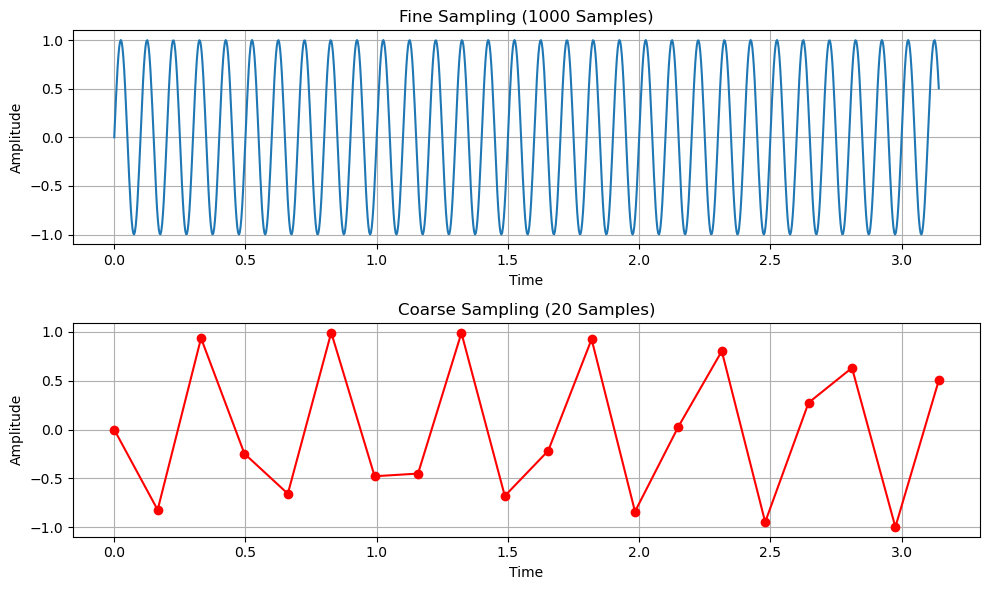

In [6]:
# Adjust the number of samples (sampling rate)

fine_samples = 1000
coarse_samples = 20 

t_fine = np.linspace(0, np.pi, fine_samples)  # High sampling rate 
t_coarse = np.linspace(0, np.pi, coarse_samples)  # Low sampling rate

# Generate the same sine wave for a single frequency (f = 10)
wave_fine = A * np.sin(2 * np.pi * 10 * t_fine)
wave_coarse = A * np.sin(2 * np.pi * 10 * t_coarse)

# Plot the wave with different sampling rates
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_fine, wave_fine, label="Fine Sampling")
plt.title("Fine Sampling (1000 Samples)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_coarse, wave_coarse, 'o-', label="Coarse Sampling", color='r')
plt.title("Coarse Sampling (20 Samples)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()

### Questions for Part 5:

1. Compare the plots from the fine sampling and coarse sampling. How does reducing the number of samples affect your ability to resolve the wave? <br>
**Reducing the amount samples makes the features of the wave harder to capture accurately. For example, the lower sampling rate seen above would give us a frequency of ~2 Hz, which is 5x less than the actual frequency (10 Hz)**

2. What happens to the shape of the wave when you reduce the number of samples? <br>
**The shape of the wave becomes less uniform - and wider, as the precieved frequency is lower.**

---
## Part 6: Nyquist Frequency and Aliasing

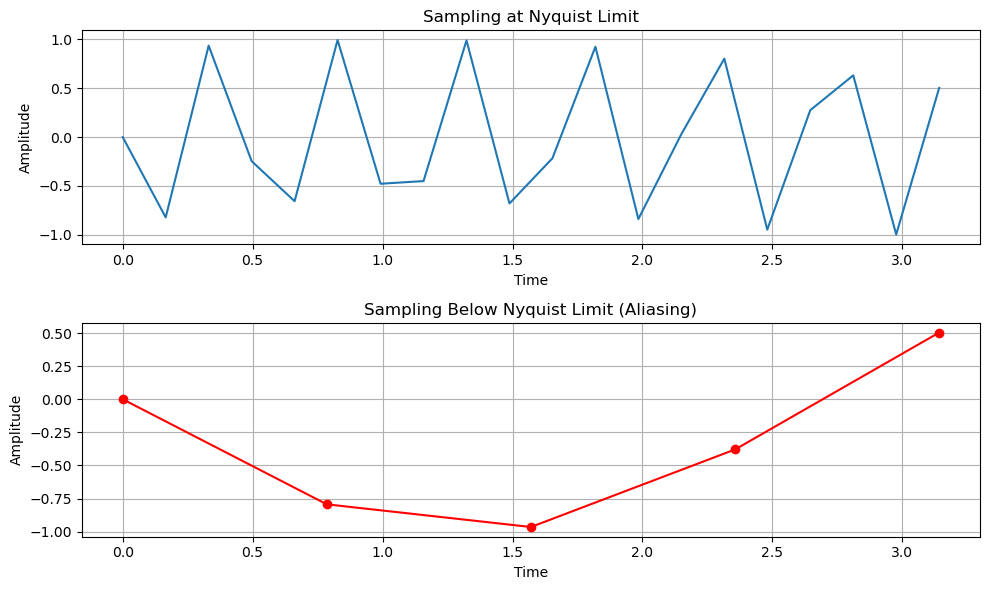

In [7]:
# Nyquist theorem: Sampling rate must be twice the highest frequency (f = 10)

f = 10

# Fine sampling (Nyquist limit)
sampling_rate_fine = f * 2 #* 3.3 # Nyquist limit: twice above the frequency. What should be the value here?
t_fine_nyquist = np.linspace(0, np.pi, int(sampling_rate_fine))

# Coarse sampling (below Nyquist limit)
sampling_rate_coarse = f / 2  # Sampling twice below the Nyquist limit
t_coarse_nyquist = np.linspace(0, np.pi, int(sampling_rate_coarse))

# Generate the wave
wave_fine_nyquist = A * np.sin(2 * np.pi * 10 * t_fine_nyquist)
wave_coarse_nyquist = A * np.sin(2 * np.pi * 10 * t_coarse_nyquist)

# Plot the wave with different sampling rates (Nyquist limit vs below)
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_fine_nyquist, wave_fine_nyquist, label="At Nyquist Limit")
plt.title("Sampling at Nyquist Limit")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_coarse_nyquist, wave_coarse_nyquist, 'o-', label="Below Nyquist Limit", color='r')
plt.title("Sampling Below Nyquist Limit (Aliasing)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.grid(True)

plt.tight_layout()
plt.show()


---
## Conclusion

### Final Questions:
1. Why is it important to sample at a rate at least twice the highest frequency present in a signal (as per the Nyquist theorem)? <br>
**Sampling the rate at twice the highest frequency allows us to make more accurate observations on the signal. Not doing so would risk wrong interpretation of the original signal.** <br> <br>
2. How does aliasing affect real-world measurements in fields like meteorology and oceanography? Give examples (e.g., wind speed or ocean current measurements). <br>
**Aliasing would mean that the signals' original data is not captured. This could affect measurements that use signals - like remote sensing techniques using satellites. This could be from ground satellites for measuring clouds, or space satellites recording variables on the surface of the Earth - like properties of the ocean surface.**